In [ ]:
# 결정 트리를 이용해
# UCI Machine Learning Repository에서 제공하는 
# 사용자 행동 인식 데이터 세트에 대한 예측 분류 수행
# http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음
# 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',
                             header=None, names = ['column_index', 'column_name'])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [3]:
feature_name_df.shape

(561, 2)

In [5]:
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [10]:
import pandas as pd

def get_human_dataset() :
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로
    # read_csv에서 공백 문자를 sep로 할당
    feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',
                                 header=None, names=['column_index', 'column_name'])
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩
    # 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt', sep = '\s+', names = feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt', sep = '\s+', names = feature_name )
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩
    # 칼럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep = '\s+', header = None, names = ['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep = '\s+', header = None, names = ['action'])
    
    # 로드된 학습/테스트용 DataFrame 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\User\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [11]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [12]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [13]:
# 레이블 값은 1, 2, 3, 4, 5, 6의 6개 값이고
# 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있다
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [15]:
# 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [17]:
# 결정 트리의 트리 깊이(Tree Depth)가 예측 정확도에 주는 영향 확인

# GridSearchCV를 이용해 사이킷런의 결정 트리의 깊이를 조절할 수 있는 
# 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능을 확인

# Fitting 5 folds for each of 7 candidates, totalling 35 fits

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.9min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8526
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8}


In [20]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.056648,0.075679,0.005924,0.005189,6,{'max_depth': 6},0.814111,0.873555,0.819728,0.865895,...,0.850925,0.028282,4,0.963253,0.938956,0.945937,0.931837,0.944256,0.944848,0.010433
1,2.651828,0.110184,0.003000,0.002449,8,{'max_depth': 8},0.820896,0.827328,0.855102,0.868618,...,0.852557,0.026007,1,0.985880,0.985377,0.984529,0.977562,0.980116,0.982693,0.003277
2,3.140289,0.159676,0.001600,0.001960,10,{'max_depth': 10},0.799864,0.813052,0.863265,0.891082,...,0.850925,0.037828,4,0.992344,0.995919,0.994560,0.992691,0.991502,0.993403,0.001607
3,3.487857,0.173534,0.009364,0.007645,12,{'max_depth': 12},0.795115,0.813052,0.848980,0.877468,...,0.844124,0.035436,7,0.995577,0.998640,0.997790,0.997790,0.996261,0.997212,0.001121
4,3.946873,0.390948,0.003939,0.006052,16,{'max_depth': 16},0.799864,0.822570,0.853061,0.887679,...,0.852149,0.037310,2,0.998979,1.000000,0.999830,0.999660,0.999830,0.999660,0.000357
5,3.917586,0.410840,0.001800,0.002227,20,{'max_depth': 20},0.803256,0.822570,0.856463,0.877468,...,0.851605,0.034855,3,0.999830,1.000000,1.000000,1.000000,1.000000,0.999966,0.000068
6,3.860446,0.324616,0.007051,0.007154,24,{'max_depth': 24},0.796472,0.822570,0.856463,0.877468,...,0.850245,0.036793,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [21]:
# max_depth 파라미터 값과 그 때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[ ['param_max_depth', 'mean_test_score', 'mean_train_score'] ]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.850925,0.944848
1,8,0.852557,0.982693
2,10,0.850925,0.993403
3,12,0.844124,0.997212
4,16,0.852149,0.999660
5,20,0.851605,0.999966
6,24,0.850245,1.000000


In [ ]:
# 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만
# 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발한다

In [22]:
max_depth = [6, 8, 10, 12, 16, 20, 24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depth :
    dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


In [23]:
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능 튜닝

# Fitting 5 folds for each of 8 candidates, totalling 40 fits
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.3min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8550
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


In [24]:
# grid_cv의 속성인 best_estimator_는 
# 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


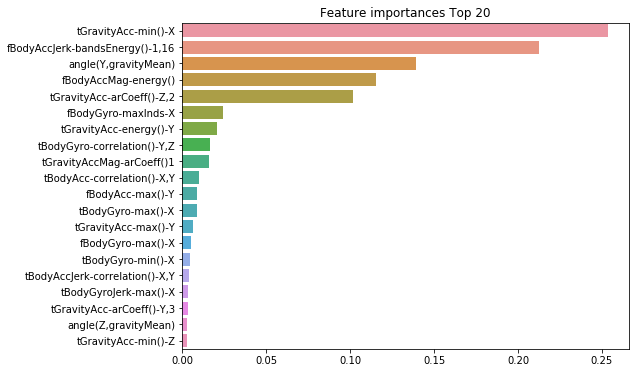

In [33]:
# 각 피처의 중요도를
# feature_importances_ 속성을 이용해 확인
# 중요도가 높은 순으로 Top 20 피처를 막대그래프로 표현

import seaborn as sns
ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 
# 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()